In [1]:
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rd_state = 666

In [3]:
all_data = pd.read_csv("train.csv")
challenge_input_ori = pd.read_csv("test.csv")

all_input_ori = all_data.drop('label', axis=1)
all_labels = all_data['label'].copy()

# Extract a validation set
train_input_ori, validate_input_ori, train_labels, validate_labels = train_test_split(all_input_ori, all_labels, test_size=0.05, random_state=rd_state)

# Extract a testing set
train_input_ori, test_input_ori, train_labels, test_labels = train_test_split(train_input_ori, train_labels, test_size=0.10, random_state=rd_state)
#train_input_ori, test_input_ori, train_labels, test_labels = train_test_split(all_input_ori, all_labels, test_size=0.1, random_state=rd_state)

train_both_ori = train_input_ori.copy()
train_both_ori['label'] = train_labels

# Sanity check
print("All data:  %s" % (all_data.shape,))
print("All input: %s" % (all_input_ori.shape,))
print("Training:  %s" % (train_input_ori.shape,))
print("Test set:  %s" % (test_input_ori.shape,))
print("Validate:  %s" % (validate_input_ori.shape,))

All data:  (42000, 785)
All input: (42000, 784)
Training:  (35910, 784)
Test set:  (3990, 784)
Validate:  (2100, 784)


In [4]:
display(train_both_ori.head() )
display(train_both_ori.describe())
display(test_input_ori.describe())

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
41068       0       0       0       0       0       0       0       0       0   
7231        0       0       0       0       0       0       0       0       0   
36165       0       0       0       0       0       0       0       0       0   
29897       0       0       0       0       0       0       0       0       0   
24386       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
41068       0  ...         0         0         0         0         0   
7231        0  ...         0         0         0         0         0   
36165       0  ...         0         0         0         0         0   
29897       0  ...         0         0         0         0         0   
24386       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  label  
41068         0         0         0         0      5  
7231          0         0         0         0      4  
36165         0         0         0         0      4  
29897         0         0         0         0      6  
24386         0         0         0         0      1  

[5 rows x 785 columns]

pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  35910.0  35910.0  35910.0  35910.0  35910.0  35910.0  35910.0  35910.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel775     pixel776      pixel777  \
count  35910.0  35910.0  ...  35910.000000  35910.00000  35910.000000   
mean       0.0      0.0  ...      0.130994      0.06870      0.023615   
std        0.0      0.0  ...      4.924266      3.54063      1.903240   
min        0.0      0.0  ...      0.000000      0.00000      0.000000   
25%        0.0      0.0  ...      0.000000      0.00000      0.000000   
50%        0.0      0.0  ...      0.000000      0.00000      0.000000   
75%        0.0      0.0  ...      0.000000      0.00000      0.000000   
max        0.0      0.0  ...    254.000000    253.00000    253.000000   

           pixel778      pixel779  pixel780  pixel781  pixel782  pixel783  \
count  35910.000000  35910.000000   35910.0   35910.0   35910.0   35910.0   
mean       0.020162      0.003342       0.0       0.0       0.0       0.0   
std        2.048844      0.448016       0.0       0.0       0.0       0.0   
min        0.000000      0.000000       0.0       0.0       0.0       0.0   
25%        0.000000      0.000000       0.0       0.0       0.0       0.0   
50%        0.000000      0.000000       0.0       0.0       0.0       0.0   
75%        0.000000      0.000000       0.0       0.0       0.0       0.0   
max      254.000000     62.000000       0.0       0.0       0.0       0.0   

              label  
count  35910.000000  
mean       4.451100  
std        2.888314  
min        0.000000  
25%        2.000000  
50%        4.000000  
75%        7.000000  
max        9.000000  

[8 rows x 785 columns]

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
count  3990.0  3990.0  3990.0  3990.0  3990.0  3990.0  3990.0  3990.0  3990.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...     pixel774     pixel775  pixel776  pixel777  pixel778  \
count  3990.0  ...  3990.000000  3990.000000    3990.0    3990.0    3990.0   
mean      0.0  ...     0.108521     0.010526       0.0       0.0       0.0   
std       0.0  ...     4.512927     0.603649       0.0       0.0       0.0   
min       0.0  ...     0.000000     0.000000       0.0       0.0       0.0   
25%       0.0  ...     0.000000     0.000000       0.0       0.0       0.0   
50%       0.0  ...     0.000000     0.000000       0.0       0.0       0.0   
75%       0.0  ...     0.000000     0.000000       0.0       0.0       0.0   
max       0.0  ...   252.000000    38.000000       0.0       0.0       0.0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
count    3990.0    3990.0    3990.0    3990.0    3990.0  
mean        0.0       0.0       0.0       0.0       0.0  
std         0.0       0.0       0.0       0.0       0.0  
min         0.0       0.0       0.0       0.0       0.0  
25%         0.0       0.0       0.0       0.0       0.0  
50%         0.0       0.0       0.0       0.0       0.0  
75%         0.0       0.0       0.0       0.0       0.0  
max         0.0       0.0       0.0       0.0       0.0  

[8 rows x 784 columns]

In [5]:
def enrich_input(some_input_ori):
    some_input = some_input_ori.copy()

    # Normalize pixel values in [0,1]
    if 'label' in some_input:
        some_input['label'] = some_input['label'] * 255
    some_input = some_input/255
    
    return some_input

In [6]:
all_input = enrich_input(all_input_ori)
train_input = enrich_input(train_input_ori)
train_both = enrich_input(train_both_ori)
test_input = enrich_input(test_input_ori)
validate_input = enrich_input(validate_input_ori)
challenge_input = enrich_input(challenge_input_ori)

# Sanity check
print("All data:      %s" % (all_data.shape,))
print("All input:     %s" % (all_input.shape,))
print("Training:      %s" % (train_input.shape,))
print("Train both:    %s" % (train_both.shape,))
print("Test set:      %s" % (test_input.shape,))
print("Validate:      %s" % (validate_input.shape,))
print("Challenge:     %s" % (challenge_input.shape,))

All data:      (42000, 785)
All input:     (42000, 784)
Training:      (35910, 784)
Train both:    (35910, 785)
Test set:      (3990, 784)
Validate:      (2100, 784)
Challenge:     (28000, 784)


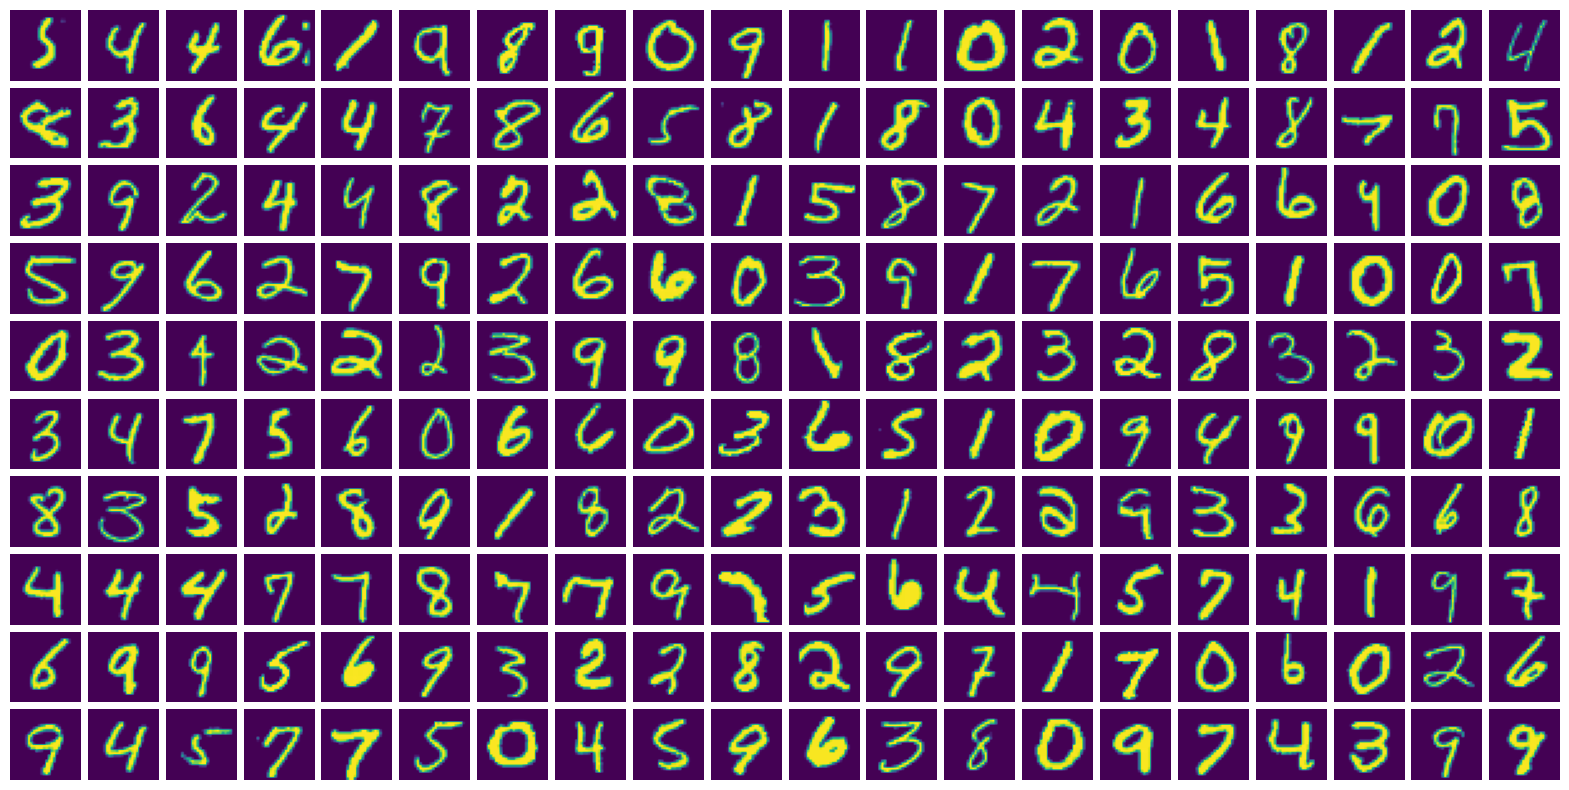

In [7]:
def show_digits(inp, X, Y):
    fX = 20
    fY = int(fX*Y/X)

    figure, axis = plt.subplots(max(Y, 2), max(X, 2), figsize=(fX,fY))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    for x in range(X):
        for y in range(Y):
            axis[y, x].imshow(inp.iloc[y*X+x].to_numpy().reshape(28, 28))
            axis[y, x].axis('off')

# Let's peek at some random digits
show_digits(train_input, 20, 10)

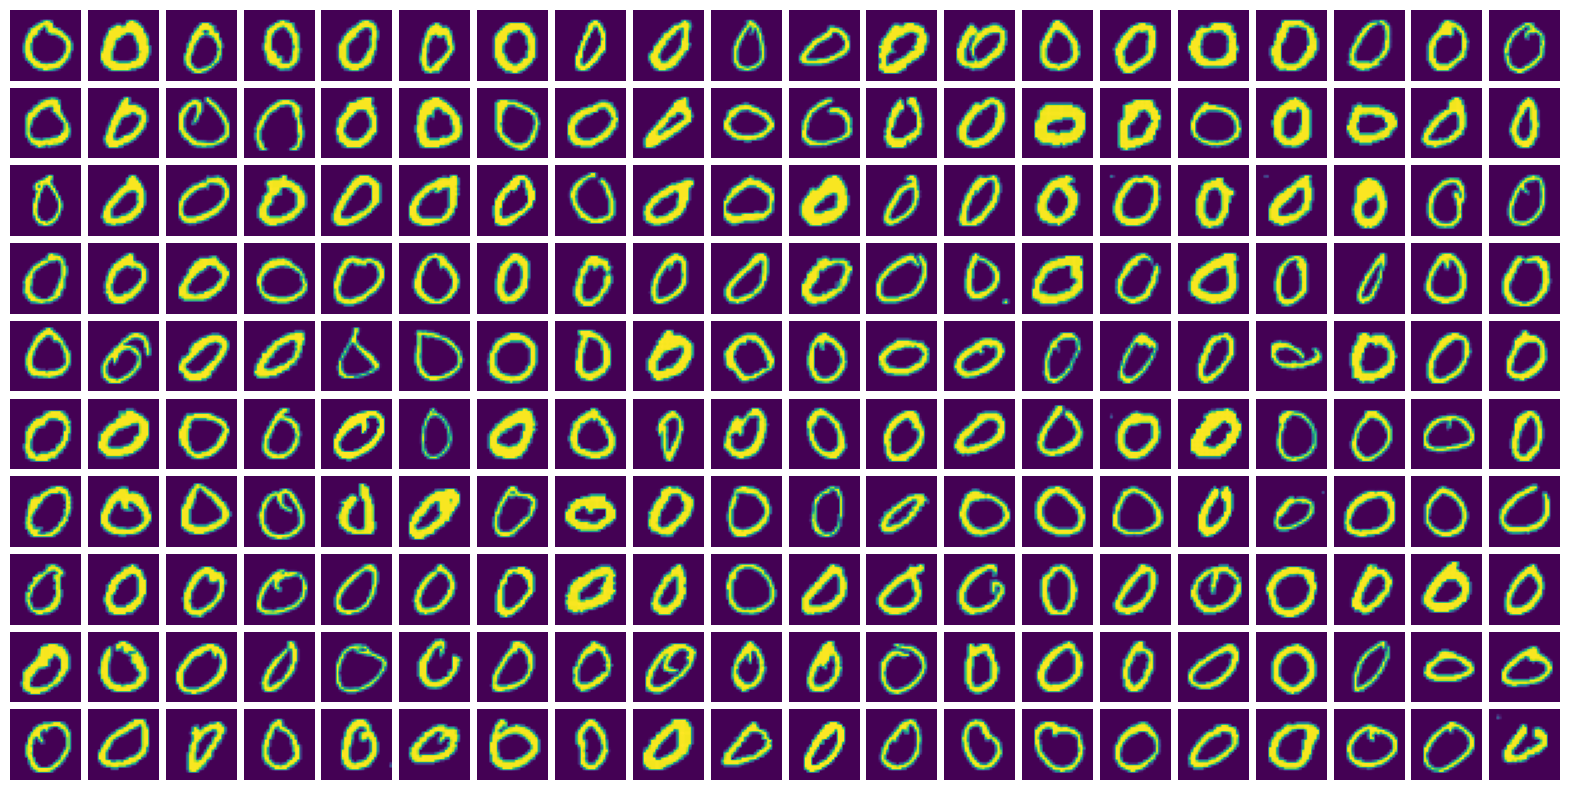

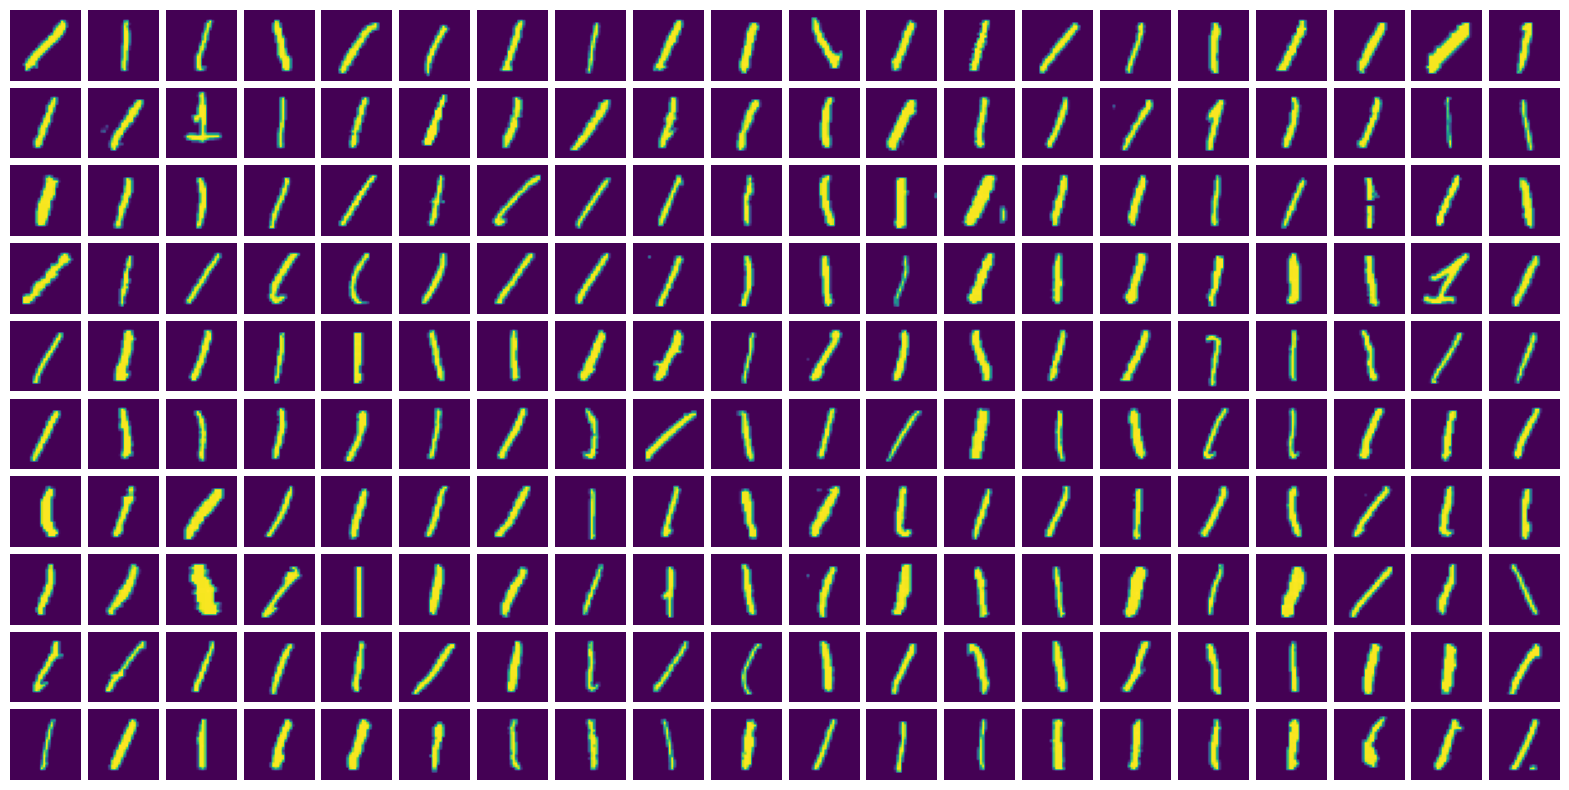

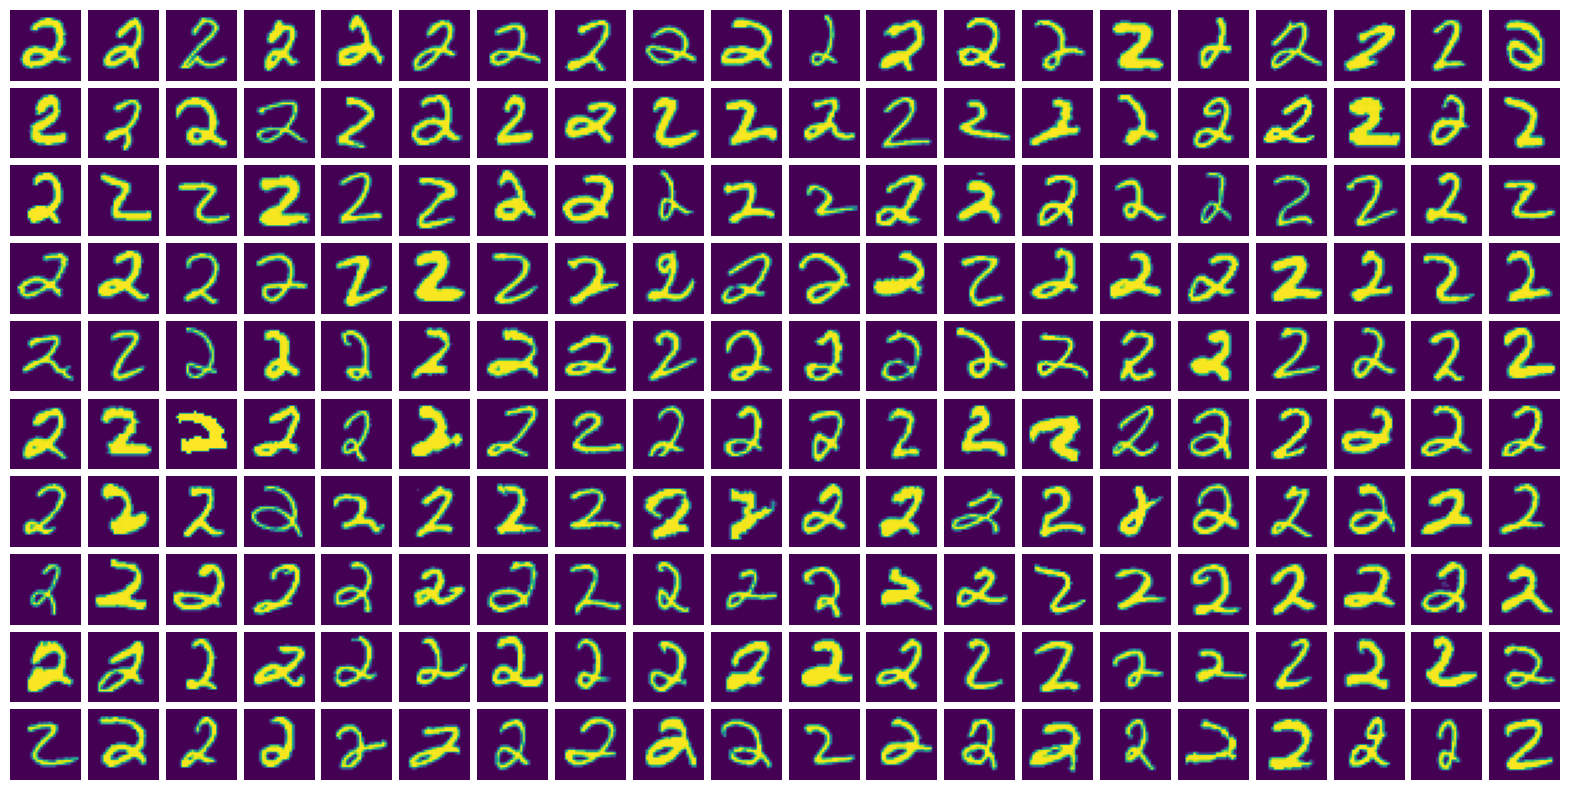

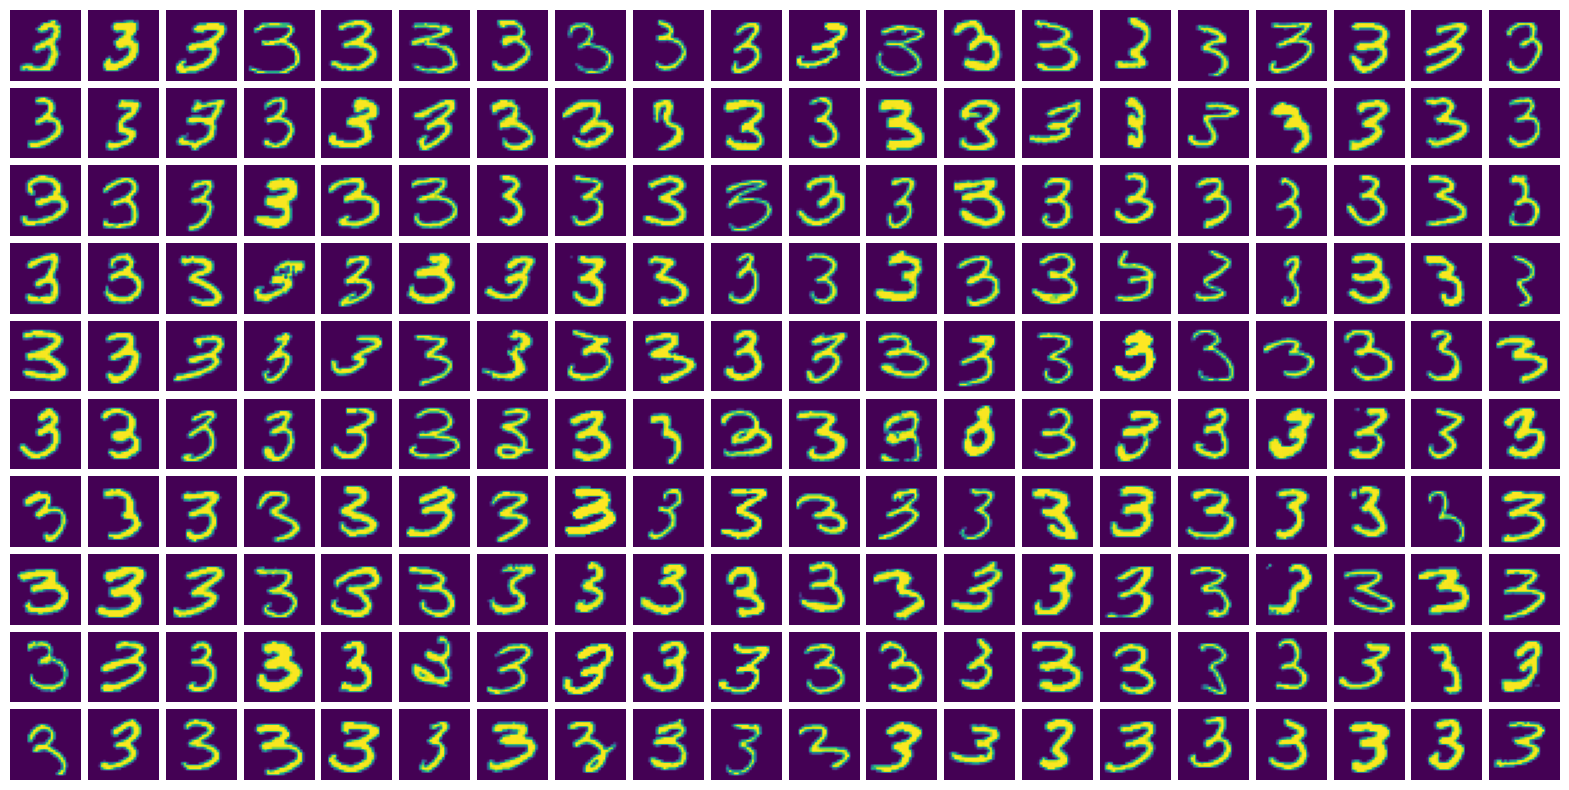

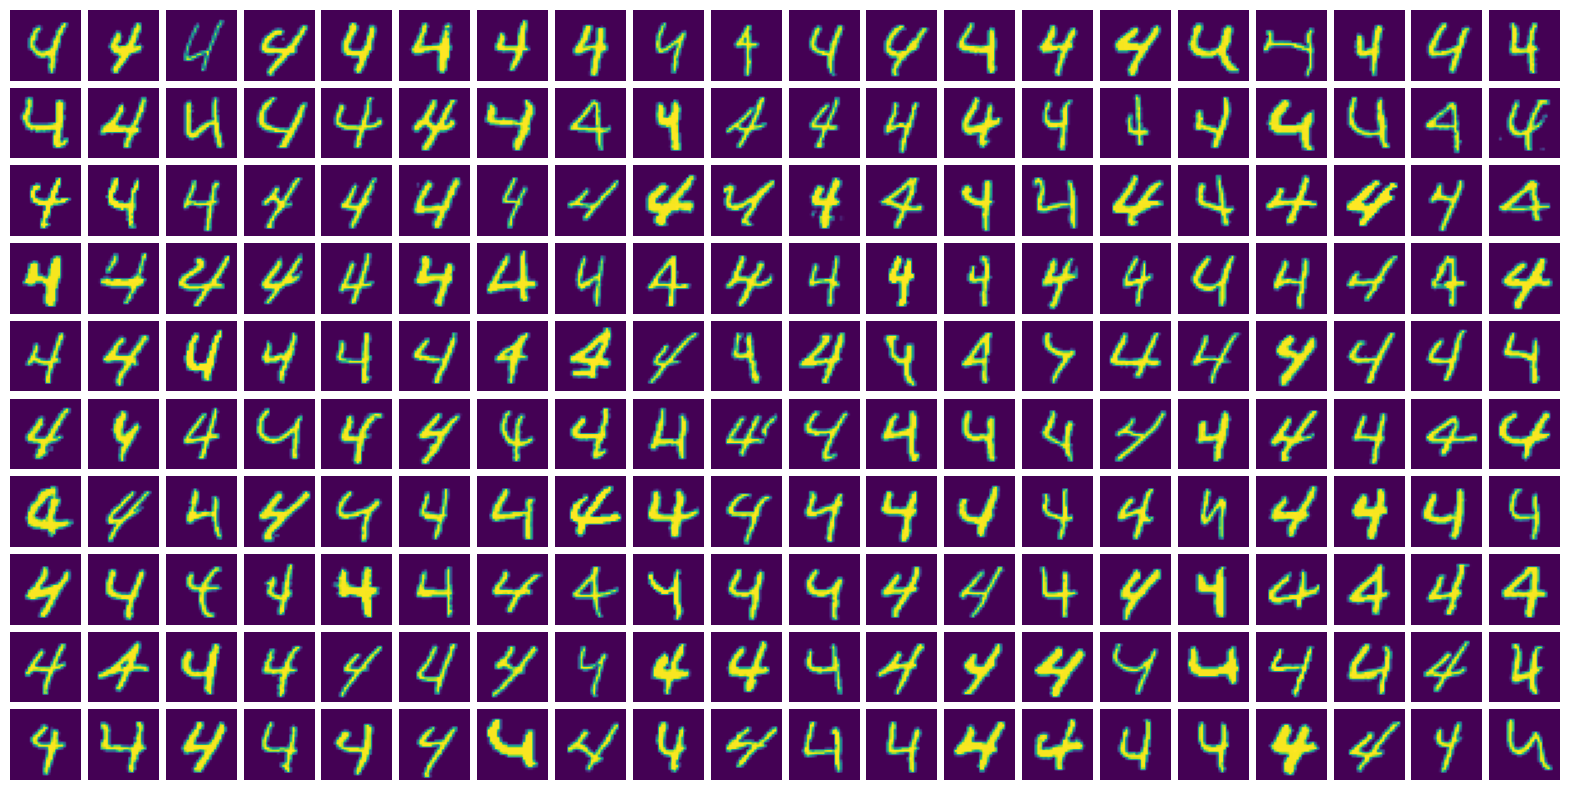

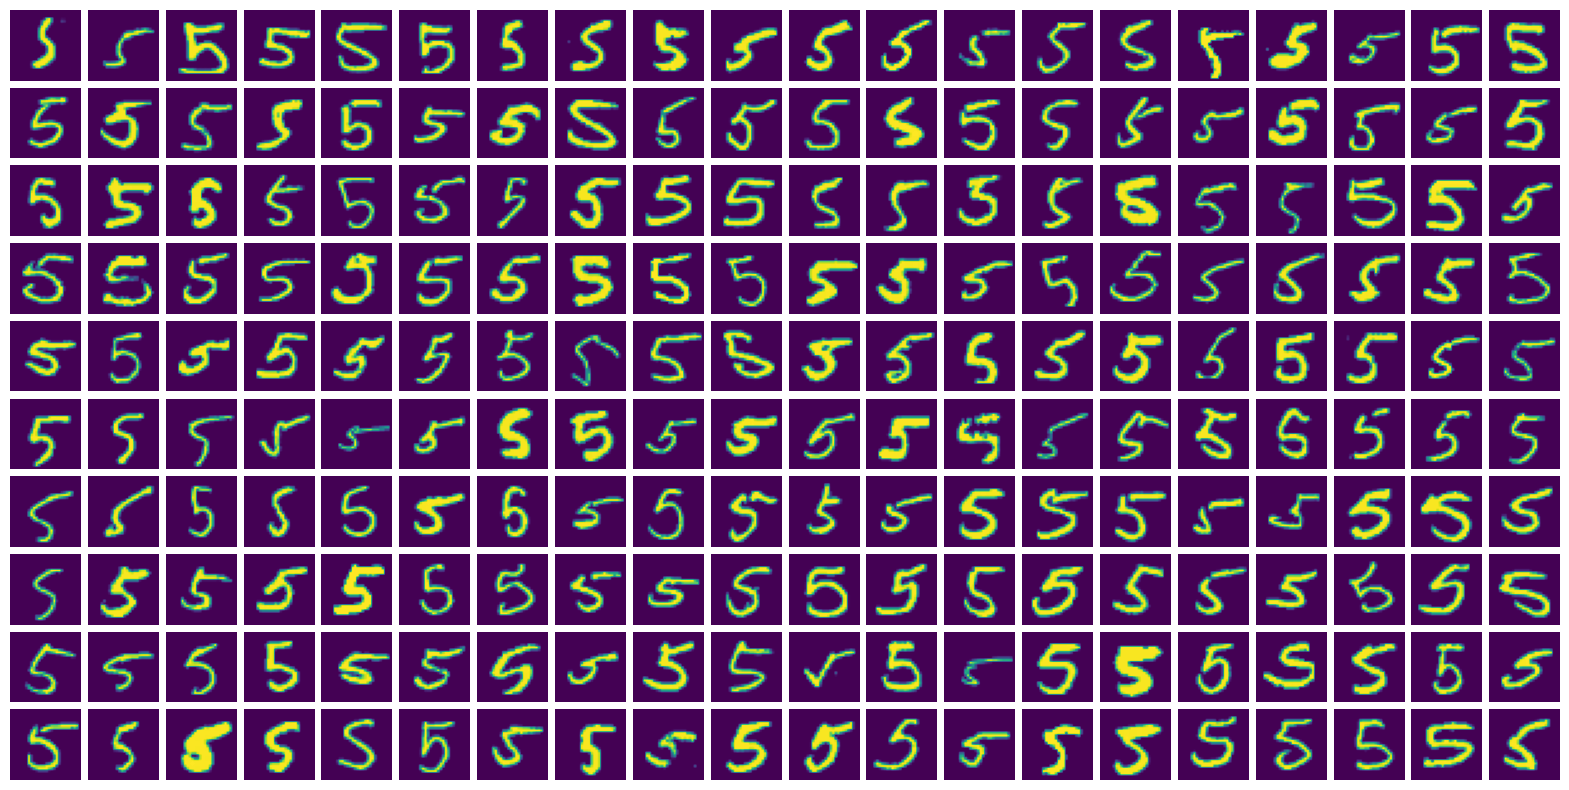

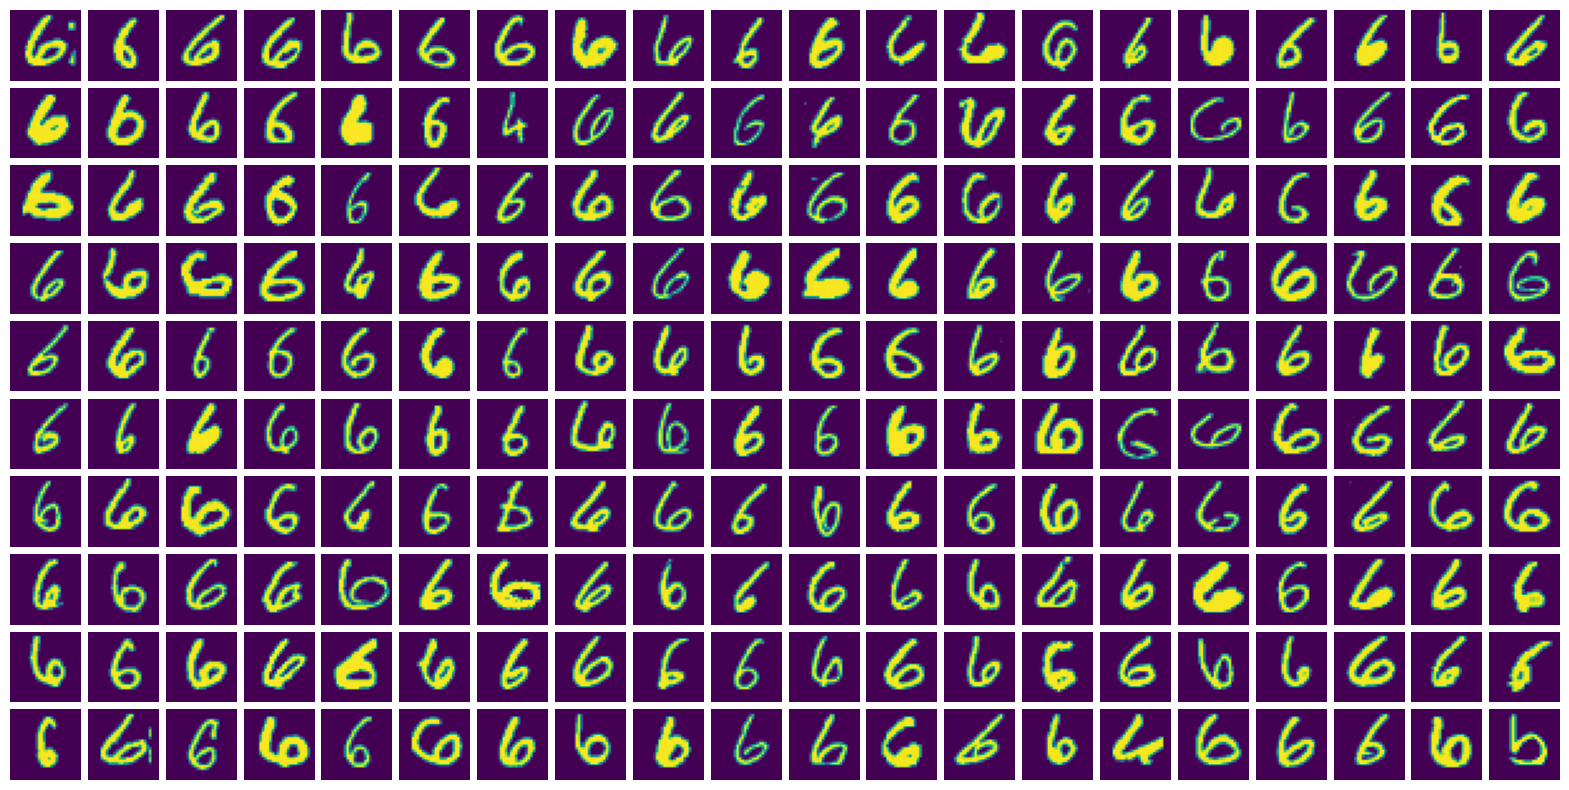

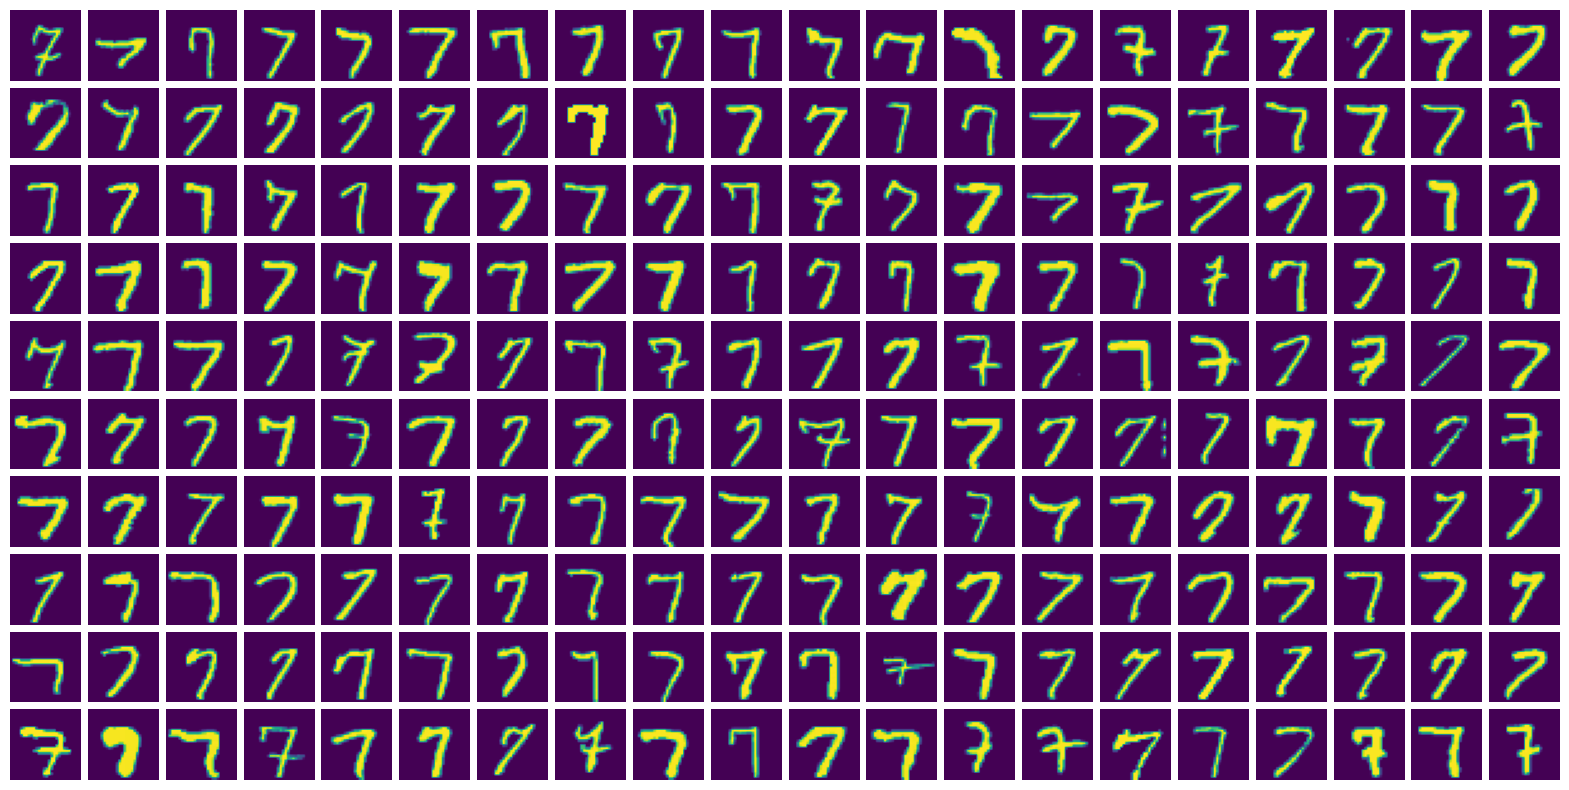

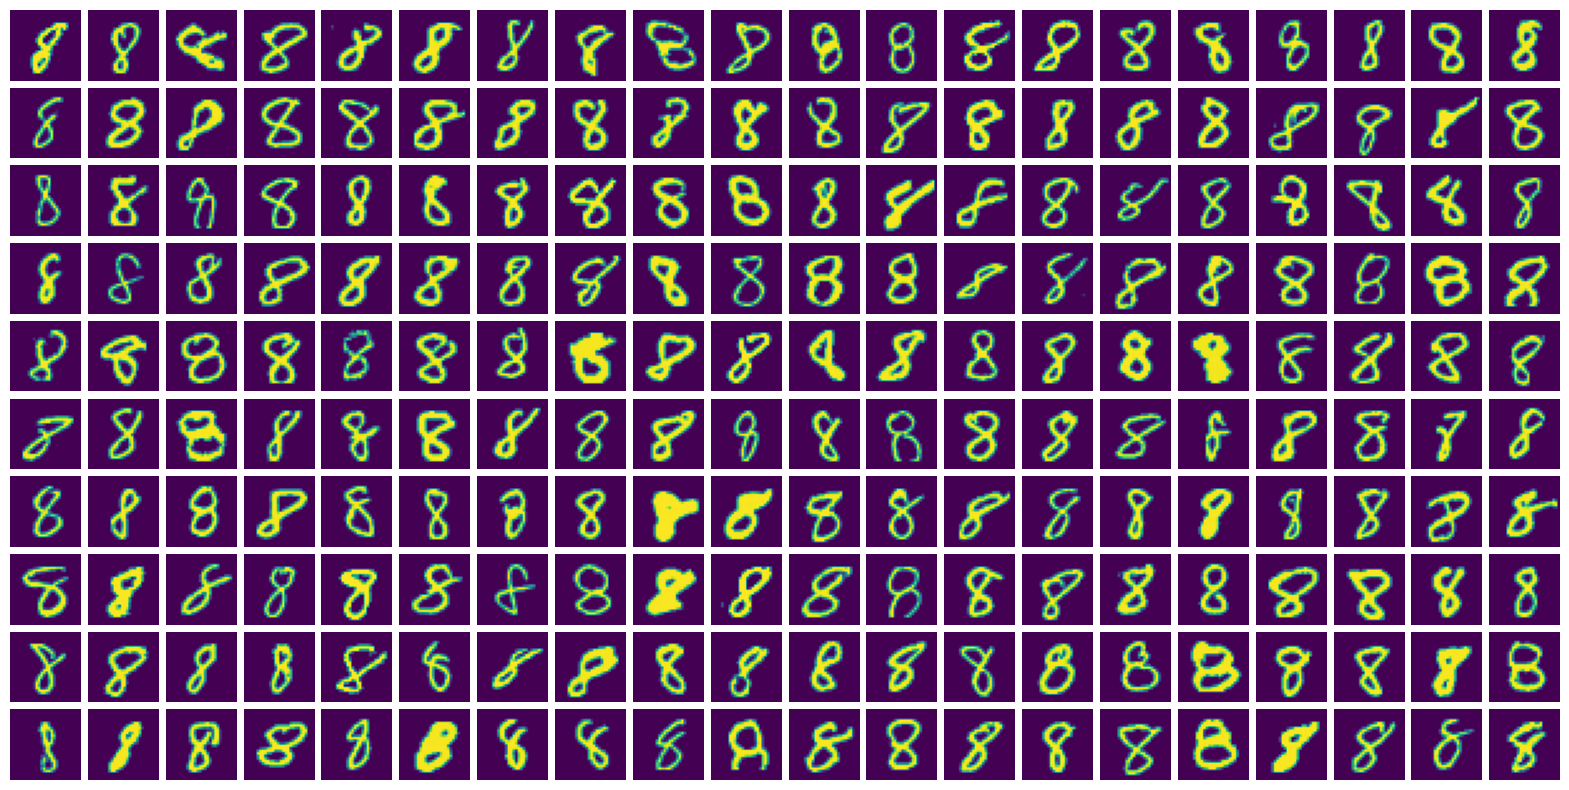

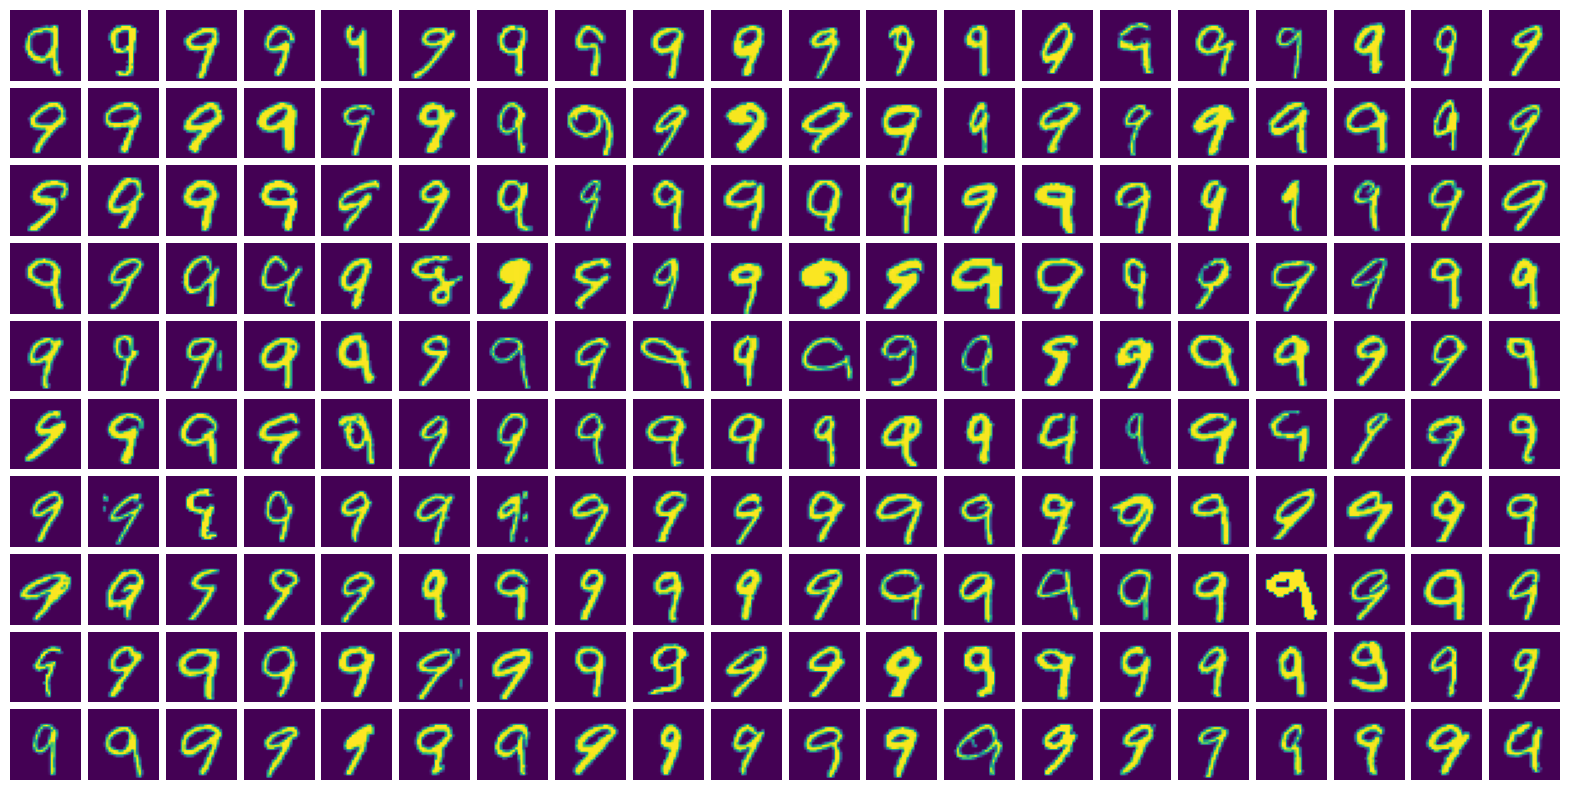

In [8]:
# Let's peek at some digits of each category
for i in range(10):
    show_digits(train_input[train_both["label"] == i], 20, 10)

In [9]:
#average_digit = []
#max_digit = []
#min_digit = []
#for i in range(10):
#    average_digit.append(pd.DataFrame(train_input[train_both["label"] == i].sum(axis=0)).transpose().copy())
#    max_digit.append(pd.DataFrame(train_input[train_both["label"] == i].quantile(q=0.99, axis=0)).transpose().copy())
#    min_digit.append(pd.DataFrame(train_input[train_both["label"] == i].quantile(q=0.15, axis=0)).transpose().copy())

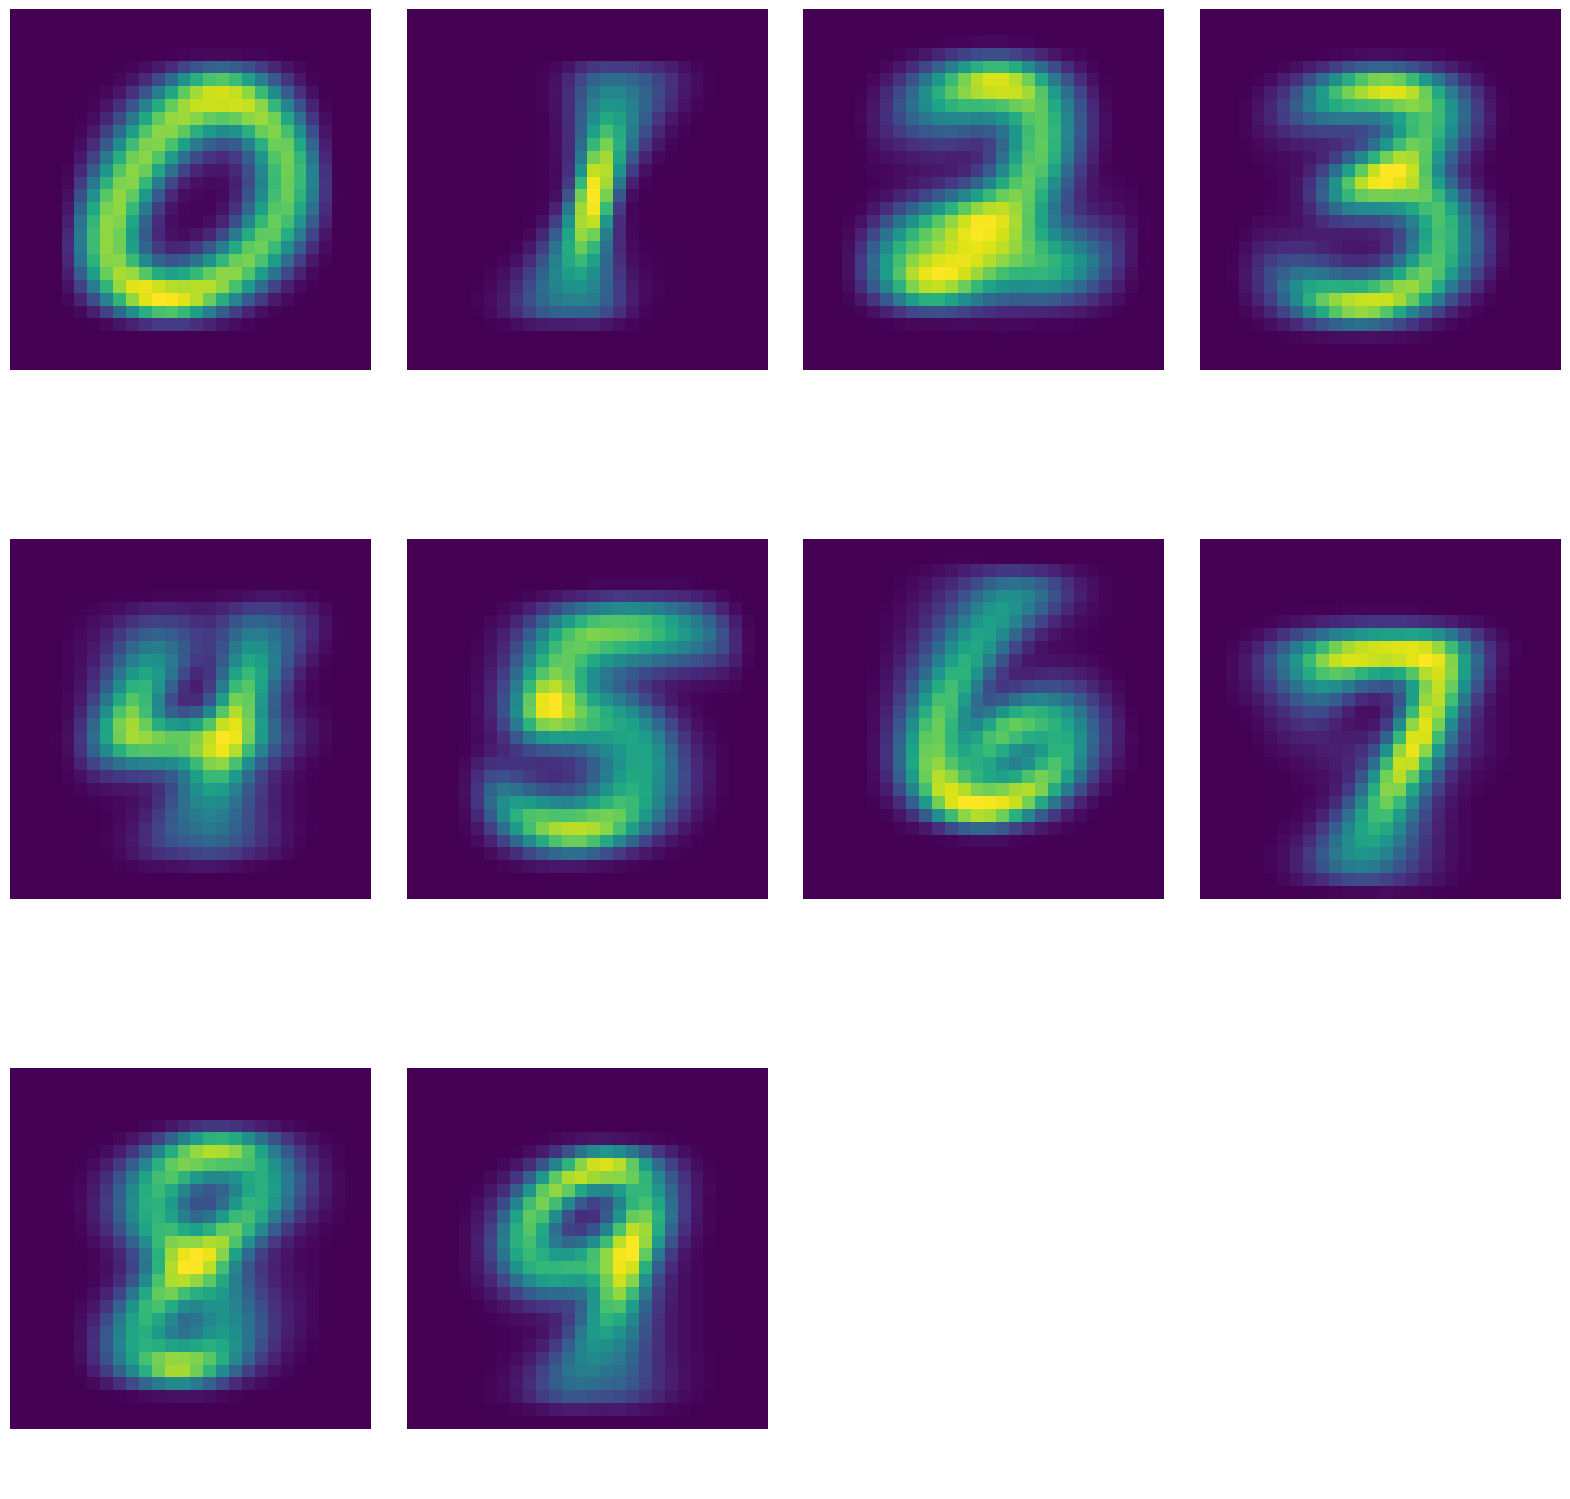

In [10]:
# What does the average digit look like?
# Which pixels are (almost) always white / black?

X = 4
Y = 3

figure, axis = plt.subplots(Y, X, figsize=(20, 20))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
for y in range(Y):
    for x in range(X):
        axis[y, x].axis('off')
        i = x+y*X
        if i > 9:
            continue
        img = pd.DataFrame(train_input[train_both["label"] == i].sum(axis=0)).transpose()
        #img = pd.DataFrame((1 - train_input[train_both["label"] == i]).quantile(q=0.75, axis=0)).transpose()
        #img = pd.DataFrame(train_input[train_both["label"] == i].quantile(q=0.99, axis=0)).transpose()
        #img = pd.DataFrame(train_input[train_both["label"] == i].quantile(q=0.95, axis=0)).transpose()
        #img = pd.DataFrame(train_input[train_both["label"] == i].quantile(q=0.15, axis=0)).transpose()
        axis[y, x].imshow(img.iloc[0].to_numpy().reshape(28, 28))
        #axis[y, x].imshow(min_digit[i].iloc[0].to_numpy().reshape(28, 28))

All pixels to consider (0): set()


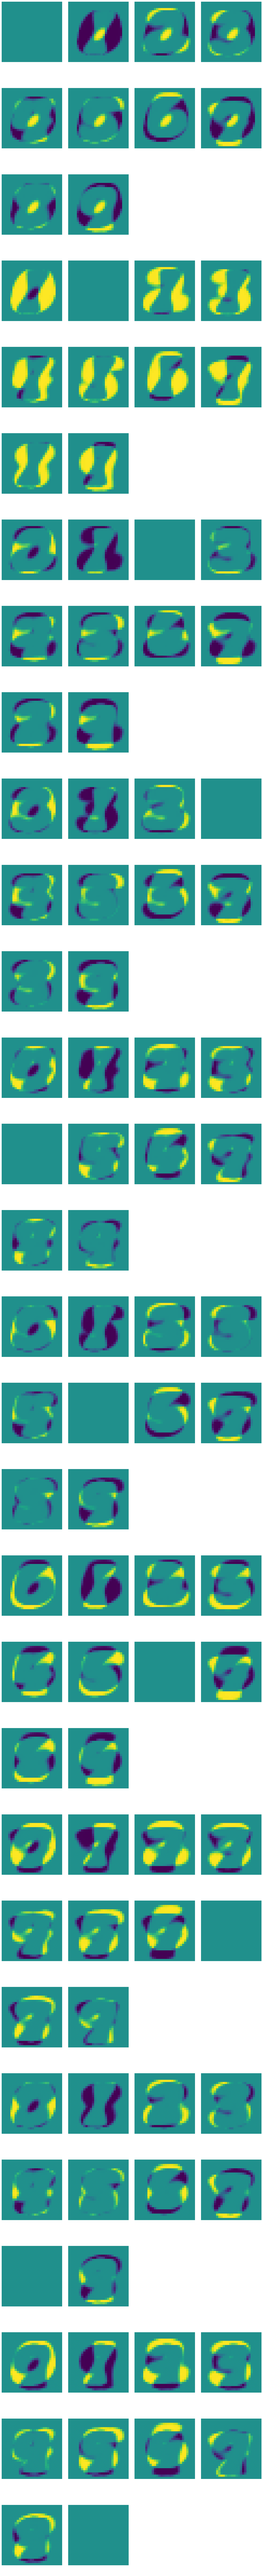

In [11]:
from matplotlib.colors import Normalize

X = 4
Y = 30

#max_val = 255  # Without normalization of pixels value
max_val = 1

setQ = 0.95
unsetQ = 0.7

pixels_of_interest = set()
set_in = []
unset_in = []
for i in range(10):
    set_in.append(pd.DataFrame(train_input[train_both["label"] == i].quantile(q=setQ, axis=0)).transpose().rename(index={setQ: "val"}))
    unset_in.append(pd.DataFrame((max_val-train_input[train_both["label"] == i]).quantile(q=unsetQ, axis=0)).transpose().rename(index={unsetQ: "val"}))

figure, axis = plt.subplots(Y, X, figsize=(20, 200))
plt.subplots_adjust(wspace=0.1, hspace=0.1)
for i in range(X*Y):
    j = i//12
    k = i%12
    x = i % X
    y = i // X
    axis[y, x].axis('off')
    if k > 9:
        continue
    img = set_in[k] - set_in[j]
    #display(unset_in[0]['pixel300'])
    #img['pixel300'] = 127.0
    #print("%s: min=%s, max=%s" % (i, img.min(axis=1).iloc[0], img.max(axis=1).iloc[0]))
    #pixels = img.transpose()
    #min_pixels = pixels[pixels["val"] < -max_val].index.to_list()
    #max_pixels = pixels[pixels["val"] > max_val].index.to_list()
    #pixels_of_interest.update(min_pixels + max_pixels)
    #print("%s: pixels to consider: %s - %s" % (i, min_pixels, max_pixels))
    axis[y, x].imshow(img.iloc[0].to_numpy().reshape(28, 28), norm=Normalize(vmin=-max_val, vmax=max_val))

print("All pixels to consider (%s): %s" % (len(pixels_of_interest), pixels_of_interest))

In [12]:
#train_both.groupby('label').count()
train_both[train_both['pixel407'] == 0.0].groupby('label').count()
#train_both[train_both['pixel267'] == 0.0].groupby('label').count()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
label                                                                           
0.0      3422    3422    3422    3422    3422    3422    3422    3422    3422   
1.0       153     153     153     153     153     153     153     153     153   
2.0       963     963     963     963     963     963     963     963     963   
3.0       756     756     756     756     756     756     756     756     756   
4.0       686     686     686     686     686     686     686     686     686   
5.0      1187    1187    1187    1187    1187    1187    1187    1187    1187   
6.0       686     686     686     686     686     686     686     686     686   
7.0      1497    1497    1497    1497    1497    1497    1497    1497    1497   
8.0       180     180     180     180     180     180     180     180     180   
9.0       432     432     432     432     432     432     432     432     432   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
label          ...                                                     
0.0      3422  ...      3422      3422      3422      3422      3422   
1.0       153  ...       153       153       153       153       153   
2.0       963  ...       963       963       963       963       963   
3.0       756  ...       756       756       756       756       756   
4.0       686  ...       686       686       686       686       686   
5.0      1187  ...      1187      1187      1187      1187      1187   
6.0       686  ...       686       686       686       686       686   
7.0      1497  ...      1497      1497      1497      1497      1497   
8.0       180  ...       180       180       180       180       180   
9.0       432  ...       432       432       432       432       432   

       pixel779  pixel780  pixel781  pixel782  pixel783  
label                                                    
0.0        3422      3422      3422      3422      3422  
1.0         153       153       153       153       153  
2.0         963       963       963       963       963  
3.0         756       756       756       756       756  
4.0         686       686       686       686       686  
5.0        1187      1187      1187      1187      1187  
6.0         686       686       686       686       686  
7.0        1497      1497      1497      1497      1497  
8.0         180       180       180       180       180  
9.0         432       432       432       432       432  

[10 rows x 784 columns]

In [ ]:
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, DotProduct, Exponentiation, ExpSineSquared, Matern, RationalQuadratic, RBF
from sklearn.impute import SimpleImputer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import balanced_accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import itertools

rd = 42


all_classifiers = dict()

# 0.76: clf = KNeighborsClassifier(3)
# 0.77: clf = SVC(kernel="linear", C=0.025, random_state=rd)
# 0.74: clf = SVC(gamma=2, C=1, random_state=rd)
# 0.74: clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=rd)
# 0.79: clf = RandomForestClassifier(max_depth=3, n_estimators=3, max_features=1, random_state=rd)
# 0.78: clf = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1, random_state=rd)
# 0.83: clf = MLPClassifier(alpha=0.1, max_iter=1000, random_state=rd)
# 0.77: clf = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=rd)
# 0.80: clf = DecisionTreeClassifier(max_depth=3, random_state=rd)
# 0.75: clf = AdaBoostClassifier(random_state=rd)
# 0.75: clf = GaussianNB()
# 0.76: clf = QuadraticDiscriminantAnalysis()

for k in range(1, 10, 3):
    all_classifiers["k-neighbors, k=%s" % k] = KNeighborsClassifier(k, metric='cityblock')

for k in ["linear", "poly", "rbf", "sigmoid"]: # linear, poly, rbf, sigmoid, precomputed
    for g in ["scale", "auto", 1, 2, 3, 5]:
        for c in [0.025, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]:
            all_classifiers["svc %s, g=%s, c=%s" % (k, g, c)] = SVC(kernel=k, gamma=g, C=c, random_state=rd)

for d in range(20, 100, 20):
    for e in range(20, 100, 20):
        for m in range(40, 100, 20):
            all_classifiers["random-forest, depth=%s, est=%s, max_features=%s" % (d, e, m)] = \
              RandomForestClassifier(max_depth=d, n_estimators=e, max_features=m, random_state=rd)

for s in range(1, 10):
    for act in ["relu"]:               # identity, relu, logistic, tanh, relu
        for solver in ["lbfgs"]:       # lbfgs (better for small datasets), sgd or adam
            for rate in ["adaptive"]:  # constant, invscaling or adaptive
                for a in [0.1, 0.5, 1]:
                    all_classifiers["mlp, sz=%s, act=%s, solver=%s, learn_rate=%s, alpha=%s" % (s, act, solver, rate, a)] = \
                      MLPClassifier(
                       hidden_layer_sizes=(s,),
                       activation=act, 
                       solver=solver,
                       learning_rate=rate, 
                       alpha=a,
                       max_iter=2000,
                       random_state=rd
                      )
                    all_classifiers["mlp2, sz=%s, act=%s, solver=%s, learn_rate=%s, alpha=%s" % ((s, s), act, solver, rate, a)] = \
                      MLPClassifier(
                       hidden_layer_sizes=(s,s),
                       activation=act, 
                       solver=solver,
                       learning_rate=rate, 
                       alpha=a,
                       max_iter=2000,
                       random_state=rd
                      )

# Avoid with large number of features
for k in [ConstantKernel(), DotProduct(), Exponentiation(RBF(), 2), 1.0 * RBF(1.0), Matern(), RationalQuadratic(alpha_bounds=(1e-5, 1e10))]:
    all_classifiers["gaussian-process, %s" % k] = GaussianProcessClassifier(kernel=k, random_state=rd)

for d in range(1, 20, 3):
    all_classifiers["decision-tree, d=%s" % d] = DecisionTreeClassifier(max_depth=d, random_state=rd)
    
for d in range(1, 3):
    all_classifiers["ada-boost, d=%s" % d] = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=d),
                                                                random_state=rd)
    
all_classifiers["gaussian-nb"] = GaussianNB()
#all_classifiers["QDA"] = QuadraticDiscriminantAnalysis()

all_classifiers.clear()
for s in range(10, 20, 5):
    for act in ["relu"]:               # identity, relu, logistic, tanh, relu
        for solver in ["sgd"]:       # lbfgs (better for small datasets), sgd or adam
            for rate in ["adaptive"]:  # constant, invscaling or adaptive
                for a in [0.1, 0.5, 1]:
                    all_classifiers["mlp, sz=%s, act=%s, solver=%s, learn_rate=%s, alpha=%s" % (s, act, solver, rate, a)] = \
                      MLPClassifier(
                       hidden_layer_sizes=(s,),
                       activation=act, 
                       solver=solver,
                       learning_rate=rate, 
                       alpha=a,
                       max_iter=100000000,
                       random_state=rd
                      )
                    all_classifiers["mlp, sz=(%s,%s), act=%s, solver=%s, learn_rate=%s, alpha=%s" % (s, s, act, solver, rate, a)] = \
                      MLPClassifier(
                       hidden_layer_sizes=(s,s),
                       activation=act, 
                       solver=solver,
                       learning_rate=rate, 
                       alpha=a,
                       max_iter=100000000,
                       random_state=rd
                      )

all_classifiers.clear()
for d in range(20, 40, 2):
    all_classifiers["ada-boost, d=%s" % d] = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=d),
                                                                random_state=rd)

max_score = 0
max_description = None
scored_classifiers = []
for description, clf in all_classifiers.items():
    try:
        pip = make_pipeline(clf)
        
        #pip.fit(train_input, train_labels)

        #test_score = pip.score(test_input, test_labels)        
        #validate_score = pip.score(validate_input, validate_labels)
        #score = min(test_score, validate_score)
        #print("%s: %s (%s, %s)" % (description, score, test_score, validate_score))
        
        scores = cross_val_score(pip, all_input, all_labels,
                                 scoring=make_scorer(balanced_accuracy_score),
                                 cv=RepeatedStratifiedKFold(n_splits=2, n_repeats=1,
                                                            random_state=rd))
        score=scores.mean()
        print("%s: %s (std: %s)" % (description, scores.mean(), scores.std()))
        
        scored_classifiers.append((score, description, pip))
        
        if score > max_score:
            max_score = score
            max_description = description
    
            # The model did good, train it on all the data we have
            pip.fit(all_input, all_labels)
        
            challenge_output = pip.predict(challenge_input)
            challenge_result = challenge_input.copy()
            challenge_result["Label"] = challenge_output
            challenge_result["ImageId"] = range(1, len(challenge_result) + 1)
            challenge_result.to_csv("cpitrat_result.csv", columns=["ImageId", "Label"], index=False)
    except e:
        print("Failed on '%s': %s" % (description, e))
    
print("Max score for '%s': %s" % (max_description, max_score))

scored_classifiers.sort(key=lambda x: x[0], reverse=True)

In [ ]:
# Let's try to build an autoencoder and interpret its output
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

# Both input & output
n_input = 28*28
# Encoder structure
n_encoder = 200
# Encoding
n_latent = 4
# Decoder structure
n_decoder = 200

reg = MLPRegressor(hidden_layer_sizes = (n_encoder, n_latent, n_decoder), 
                   activation = 'relu', 
                   solver = 'adam', 
                   learning_rate_init = 0.0001, 
                   max_iter = 1000,
                   tol = 0.0000001, 
                   verbose = True)

reg.fit(train_input, train_input)

In [ ]:
import copy
from sklearn.neural_network._base import ACTIVATIONS

def show_layers_stats(coefs):
    print(len(coefs))
    for i in range(len(coefs)):
        print(" - %s" % len(coefs[i]))

show_layers_stats(reg.coefs_)

encoder = copy.deepcopy(reg)
encoder.coefs_ = reg.coefs_[0:2]
encoder.intercepts_ = reg.intercepts_[0:2]
encoder.n_layers_ = 3
encoder.n_features_in_ = n_input
encoder.n_outputs_ = n_latent
encoder.out_activation_ = 'relu'
show_layers_stats(encoder.coefs_)

decoder = copy.deepcopy(reg)
decoder.coefs_ = reg.coefs_[2:]
decoder.intercepts_ = reg.intercepts_[2:]
decoder.n_layers_ = 3
decoder.n_features_in_ = n_latent
decoder.n_outputs_ = n_input
decoder.out_activation_ = reg.out_activation_
show_layers_stats(decoder.coefs_)

train_encoded = encoder.predict(train_input)
train_decoded = decoder.predict(train_encoded)
train_output = reg.predict(train_input)

train_encoded[0]

In [ ]:
show_digits(train_input, 20, 10)

In [ ]:
show_digits(pd.DataFrame(train_output), 20, 10)

In [ ]:
show_digits(pd.DataFrame(train_decoded), 20, 10)

In [ ]:
train_encoded[0:20]

In [ ]:
means = []
stds = []
for i in range(10):
    mean = pd.DataFrame(train_encoded[train_both['label'] == i]).describe().loc['mean'].to_numpy()
    display("%s -> %s (+/- %s)" % (i, mean, std))
    std = pd.DataFrame(train_encoded[train_both['label'] == i]).describe().loc['std'].to_numpy()
    stds.extend(std)
    means.append(mean-std)
    means.append(mean)
    means.append(mean+std)

display("Encoded values between %s and %s" % (min(train_encoded.flatten()), max(train_encoded.flatten())))
display("std between %s and %s" % (min(stds), max(stds)))
decoded_means = decoder.predict(means)
show_digits(pd.DataFrame(decoded_means), 6, 5)


In [ ]:
# Morphing one digit into another

steps = 10

def morph(fr, to, steps):
    d = [(x-y)/(steps-1) for (x,y) in zip(to, fr)]
    res = []
    for i in range(steps):
        res.append([x+i*y for (x,y) in zip(fr,d)])
    return res

enc = []
for i in range(10):
    enc.append(means[3*i+1])
    
myencoded = \
  morph(enc[0], enc[6], steps) + \
  morph(enc[0], enc[5], steps) + \
  morph(enc[1], enc[7], steps) + \
  morph(enc[1], enc[8], steps)

decoded_myencoded = decoder.predict(myencoded)
show_digits(pd.DataFrame(decoded_myencoded), steps, len(myencoded)//steps)

In [ ]:
basis = decoder.predict(10*np.identity(n_latent))
show_digits(pd.DataFrame(basis), 4, 1)

In [ ]:
def combis(n, vals):
    result = []
    if n == 1:
        return [[x] for x in vals]
    for l in combis(n-1, vals):
        for v in vals:
            result.append(l + [v])
    return result
        

basis = decoder.predict(20*np.array(combis(n_latent, [0, 0.5, 1])))
show_digits(pd.DataFrame(basis), 9, basis.shape[0]//9)

In [ ]:
basis = decoder.predict(10*np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1],
]))
show_digits(pd.DataFrame(basis), 8, 2)